In [ ]:
"""
데이터의 표현
- vector / matrix
- vector 표현하고자 하는것 : 크기와 방향
- 크기 : kmeans, knn
- 방향(내적) : PCA, MDS, FFNN(신경망)
- kmeans clustering(군집분석)
    - k개수, 중심값이 먼저 결정
    - 지속적으로 중심값을 재계산하고 군집이 완료되면 그 군집수만큼 중심이 존재
    - 중심값을 해석하면 그 군집의 의미를 확인할수 있음(domain knowledge)
    - 대분류, 원형이상치 제거, 벡터 양자화(압축), 이상탐지(침입탐지) : 어떤그룹에도 속하지않는 데이터, 추천
        IOT에서 파형 clustering ( tsclustering )
- 거리값 전처리 : 정규화 : 가중치를 제거하기 위해서 - 독립변수의 영향력을 균등하게
- 거리값 알고리즘 : 유클리디안 거리값(제곱), 맨하탄 거리값(절대값), 민코프스키 거리값(지수변화)
- agglomerative hierachical clustering(계층적군집)
- DBSCAN : 핵심, 경계, 잡음 : eps(거리값), min_pts(군집화의 최소값)
    - eps값을 크게하면 군집수는 줄어들고 잡음은 줄어듬
- 키와 체중을 독립변수 : 키에 가중치가 부여된것과 같음 - 잘못 클러스트링 된다
    - 거리값을 계산이 됨 : 정보의 왜곡을 가지고 옴
"""

In [2]:
import numpy as np
import scipy
import sklearn.metrics.pairwise
a_64 = np.array([61.22, 71,60, -65.755], dtype=np.float64)
b_64 = np.array([61.22, 71,608, -65.72], dtype=np.float64)
a_32 = a_64.astype(np.float32)
b_32 = b_64.astype(np.float32)
# 거리값을 구할때는 정규화해서 작업
# 데이터타입도 고려해야함
dist_64_np = np.array([np.linalg.norm(a_64 - b_64)], dtype=np.float64)
dist_32_np = np.array([np.linalg.norm(a_32 - b_32)], dtype=np.float32)
print("64비트형", dist_64_np)
print("32비트형", dist_32_np)
dist_64_sklearn = sklearn.metrics.pairwise.pairwise_distances([a_64], [b_64])
#직각으로 가는 절대값 거리
dist_64_sklearn_manhattan = sklearn.metrics.pairwise.pairwise_distances([a_64], [b_64], metric='manhattan' )
print(dist_64_sklearn)
print(dist_64_sklearn_manhattan)
from sklearn.metrics.pairwise import euclidean_distances #특화함수
print("euclidean_distances", euclidean_distances([a_64], [b_64]))

64비트형 [548.00000112]
32비트형 [548.]
[[548.00000112]]
[[548.035]]
euclidean_distances [[548.00000112]]


In [3]:
# 방향값 계산
import numpy as np
a = np.array([0,1,0]) # 공간좌표계 y축
b = np.array([1,0,0]) # x축 = 90도
res=np.dot(a,b)
print(res) # 내적결과가 0 : 직교
# 단일벡터 : 크기:norm, 방향:normalize
print(np.linalg.norm(a)) 
print(np.linalg.norm(b))
print(np.linalg.norm(a) * np.linalg.norm(b))
rad = res / (np.linalg.norm(a) * np.linalg.norm(b))
print("cos theta", rad)
print(np.arccos(rad)) # 각도
print(np.degrees(np.arccos(rad))) # radian(호의 길이로표현된 각도) / degree(사람)

0
1.0
1.0
1.0
cos theta 0.0
1.5707963267948966
90.0


In [4]:
"""
knn ( k neighbor neareat )
- k값을 이용해서 변화
- 큰 k 값 : Bias가 감소
- 작은 k값 : 과적합 (Variance 가 감소)
- 정규화, 범주형변수인 경우에는 dummy coding(원핫인코딩) 을 전처리 
"""
import numpy as np
from sklearn.neighbors import NearestNeighbors
samples = [[0, 0, 2], [1, 0, 0], [0, 0, 1]]

neigh = NearestNeighbors(2, 0.4) # k=2개를 살피고, 반지름 범위
neigh.fit(samples)
neigh.kneighbors([[0, 0, 1.3]], 2, return_distance=False) # [ 2 0 ]
# 반지름 이내의 포인트 찾기
nbrs = neigh.radius_neighbors([[0, 0, 1.3]], 0.4, return_distance=False) # [ 0 ]
np.asarray(nbrs[0][0])

array(2, dtype=int64)

In [25]:
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
iris = datasets.load_iris() # 변수가 4개 종속변수 1
X = iris.data[:, :2] # 변수 2개, 실제 데이터를 직접입력 or 미리계산된 거리행렬
y_iris = iris.target
km2 = cluster.KMeans(n_clusters=2).fit(X)
km3 = cluster.KMeans(n_clusters=3).fit(X)
km4 = cluster.KMeans(n_clusters=4).fit(X)

8


array([[6.8804878 , 3.09756098],
       [4.77777778, 2.94444444],
       [5.9245283 , 2.7509434 ],
       [5.22068966, 3.66551724]])

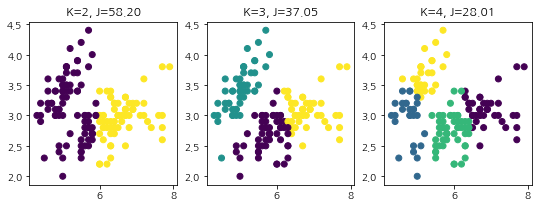

In [26]:
plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=km2.labels_)
plt.title("K=2, J=%.2f" % km2.inertia_) # 그룹내 거리의 제곱값의 합계: 군집까지거리 : 그룹핑 잘됐으면 작은값이 최적
plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=km3.labels_)
plt.title("K=3, J=%.2f" % km3.inertia_)
plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=km4.labels_)
plt.title("K=4, J=%.2f" % km4.inertia_) # 문제있다

print(km4.n_iter_) # 반복해서 학습한 회수
km4.cluster_centers_ # 그룹 센터점 : 중심점을 해석해서 분석

In [ ]:
km4.labels_ #각지점의 레이블 (소속 센터점)

[[7 5]
 [5 7]
 [7 7]
 [4 4]
 [4 6]
 [1 4]
 [0 0]
 [2 2]
 [8 7]
 [6 8]
 [5 5]
 [3 7]]


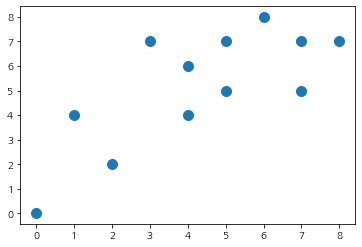

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# 12 x 2 # sample(data point) X 변수 2
X = np.array([[7, 5],[5, 7],[7, 7],[4, 4],[4, 6],[1, 4],
              [0, 0],[2, 2],[8, 7],[6, 8],[5, 5],[3, 7]])
print(X)
plt.scatter(X[:,0], X[:,1], s=100)
plt.show() 

[[6.6        6.8       ]
 [2.71428571 4.        ]]
[6.6 6.8] [2.71428571 4.        ]
[0 0 0 1 1 1 1 1 0 0 0 1]
12
63.004081632653055


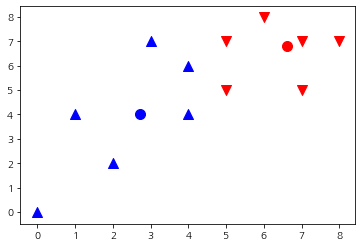

In [8]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, init='random', n_init=1, max_iter=1, random_state=1).fit(X)
print(model.cluster_centers_)
c0, c1 = model.cluster_centers_
print(c0, c1)
print(model.labels_)
print(len(model.labels_))
print(model.inertia_) # 그룹수가 많아지면 자동으로 줄어듬 : 여기서는 평가의 척도가 되진 않음
# 2개의 변수 
plt.scatter(X[model.labels_==0,0], X[model.labels_==0,1], s=100, marker='v', c='r')
plt.scatter(X[model.labels_==1,0], X[model.labels_==1,1], s=100, marker='^', c='b')
plt.scatter(c0[0], c0[1], s=100, c='r') # 중심점
plt.scatter(c1[0], c1[1], s=100, c='b')
plt.show()

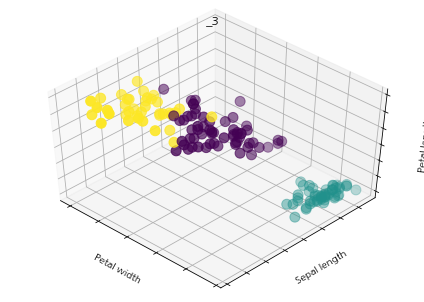

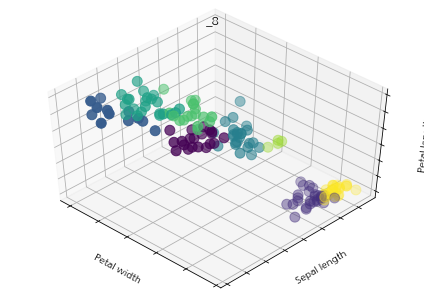

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets
np.random.seed(5)
centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target
estimators = {'_3': KMeans(n_clusters=3),
              '_8': KMeans(n_clusters=8)} # 모델 인스턴스
fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum)
    plt.clf() 
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)# 카메라의 초기치 결정
    plt.cla()
    est.fit(X) # 도화지 초기화 
    labels = est.labels_ # 전체 데이터에 대한 레이블
    # 4개의 변수  3차원으로 출력위해 변수한개를 제거 (4차원 시각화...)
    # 4차원으로 출력하기 위해선 => PCA, MDS로 차원축소
    # color값은 정수형(0~255), 부동소수점(정규화) 이번엔 부동소수점
    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float), s=100)
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    plt.title(name)
    fignum = fignum + 1
plt.show() 

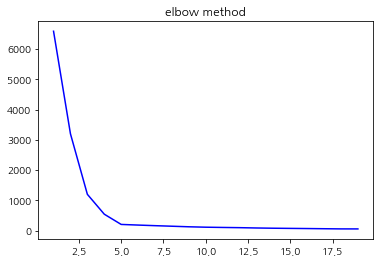

In [10]:
# K값 결정을 위한 elbow기법 : 변화가 극단적으로 적어지는 꺽인 부분까지가 적당 : 이 그룹은 5개 4개가 적당하다
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=100, centers=5, random_state=101)

import seaborn as sns
from sklearn.cluster import KMeans
elbow=[]
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=101)
    kmeans.fit(X)
    elbow.append(kmeans.inertia_) # 각 요소가 자기가 속한 군집까지의 거리
sns.lineplot(range(1, 20), elbow, color='blue')
plt.rcParams.update({'figure.figsize':(10, 7.5), 'figure.dpi':100})
plt.title('elbow method')
plt.show()    
    

In [ ]:
"""
군집모델의 평가
-조정랜드지수 : 가능한 모든 데이터 쌍의 갯수에 대해 정답인 데이터 쌍의 갯수의 비율
    정답을 알고있을때(의미가 없다)
-실루엣(Silhouette) <- 주로 사용
    모든 샘플에 대해서 계산
    a = 데이터가 속한 군집의 거리제곱값의 평균
    b = 자기가 속한 군집이외에 가장 가까운 군집과의 거리
    (b-a)/max(a, b)
    a가 b보다 크면 군집이 잘됨 : 양수
    실루엣 지수는 크면 좋음
"""

([], <a list of 0 Text yticklabel objects>)

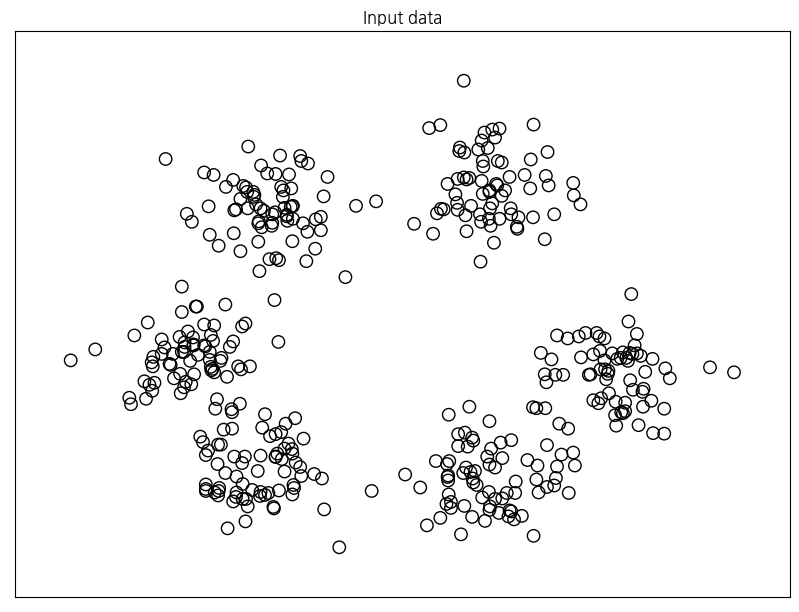

In [11]:
from sklearn import metrics
from sklearn.cluster import KMeans
# data_quality : 변수가 2개
X = np.loadtxt('data_quality.txt', delimiter=',')
plt.figure()
plt.scatter(X[:,0], X[:,1], color='black', s=80, marker='o', facecolors='none')
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
plt.title('Input data')
plt.xlim(x_min, x_max) # 영역제한
plt.ylim(y_min, y_max) 
plt.xticks(())
plt.yticks(())

In [27]:
scores = []
values = np.arange(2, 10)
for num_clusters in values: # 클러스터스 == 군집수 : 샘플 labels, 군집 중심값 결정
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init=10) # 10번 시도
    kmeans.fit(X)
    score = metrics.silhouette_score(X, kmeans.labels_, metric='euclidean', sample_size=len(X))
    print("\n클러스터의 수 = ", num_clusters)
    print("실루엣 지수", score) # 
    scores.append(score)


클러스터의 수 =  2
실루엣 지수 0.46295497736359775

클러스터의 수 =  3
실루엣 지수 0.4450525692083638

클러스터의 수 =  4
실루엣 지수 0.4228575091523146

클러스터의 수 =  5
실루엣 지수 0.3957877712257136

클러스터의 수 =  6
실루엣 지수 0.3994845194011502

클러스터의 수 =  7
실루엣 지수 0.39508318918611446

클러스터의 수 =  8
실루엣 지수 0.3960859320677839

클러스터의 수 =  9
실루엣 지수 0.3835104849582263


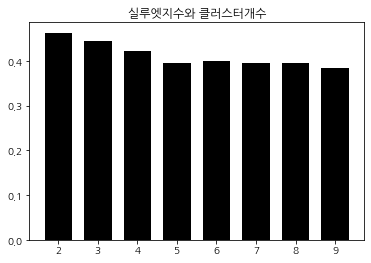


최적의 클러스터 수 = 2


In [28]:
plt.figure()
plt.bar(values, scores, width=0.7, color='black', align='center')
plt.title('실루엣지수와 클러스터개수')
plt.show()

num_clusters = np.argmax(scores) + values[0]
print('\n최적의 클러스터 수 =', num_clusters) 

In [ ]:
#폰트 안나와서 다시 추가
import matplotlib as mpl
mpl.matplotlibb_fname()

In [ ]:
# 오전 종료 조퇴 ===========================================================================================================================================================================================================

In [ ]:
"""
elbow 는 k값 결정
실루엣 지수는 평가 지수
"""

In [12]:
# 벡터 양자화
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
n_colors = 64
china = load_sample_image("china.jpg")
china = np.array(china, dtype=np.float64) /255

w, h, d= original_shape = tuple(china.shape)
print(w,h,d)
assert d ==3
image_array= np.reshape(china, (w*h,d)) # color 값을 중심으로 2차원으로 ㅁ나듬
print("Kmeans 데이터 피팅")
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)

print("kmeans 예측")
labels = kmeans.predict(image_array)
# 427*640 개의 라벨 생성
# 중심값 64개-> labels를 저장
def recreate_image(codebook, labels, w, h):# label로 표현된 값을 원래의 color값으로 복원
    d = codebook.shape[1] # 0,1 => 사이즈, 라벨
    image = np.zeros((w,h,d)) # ㅜ언래 이미지 사이ㅡㅈ로 초기화
    label_idx = 0

    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]] # 원래 컬러값 가져옴
            label_idx += 1
    return image

427 640 3
Kmeans 데이터 피팅
kmeans 예측


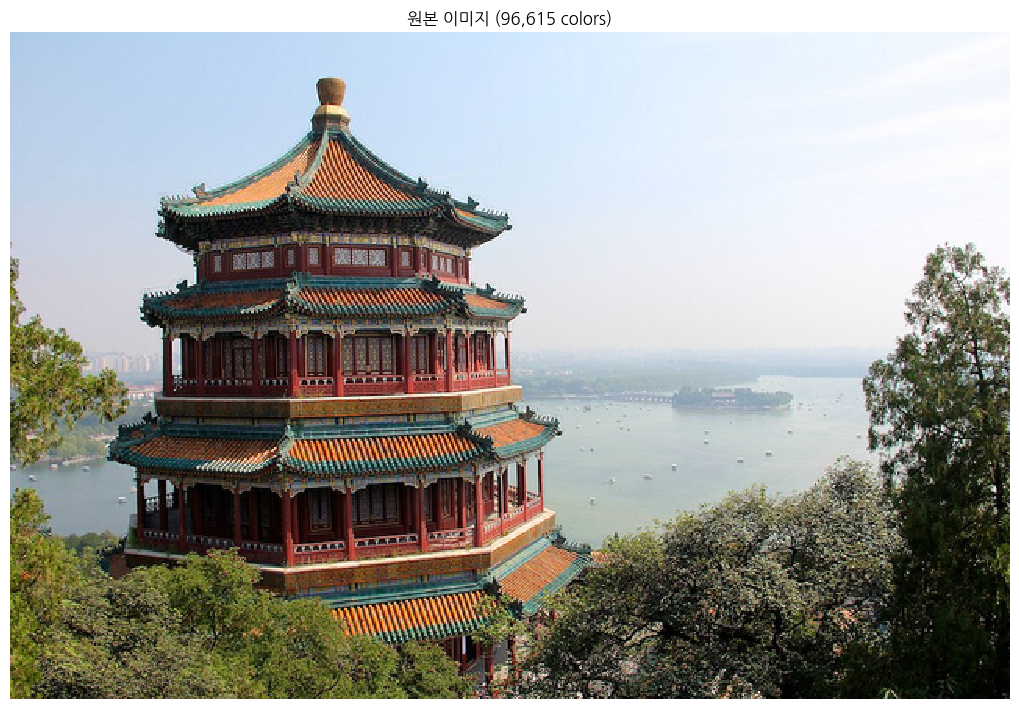

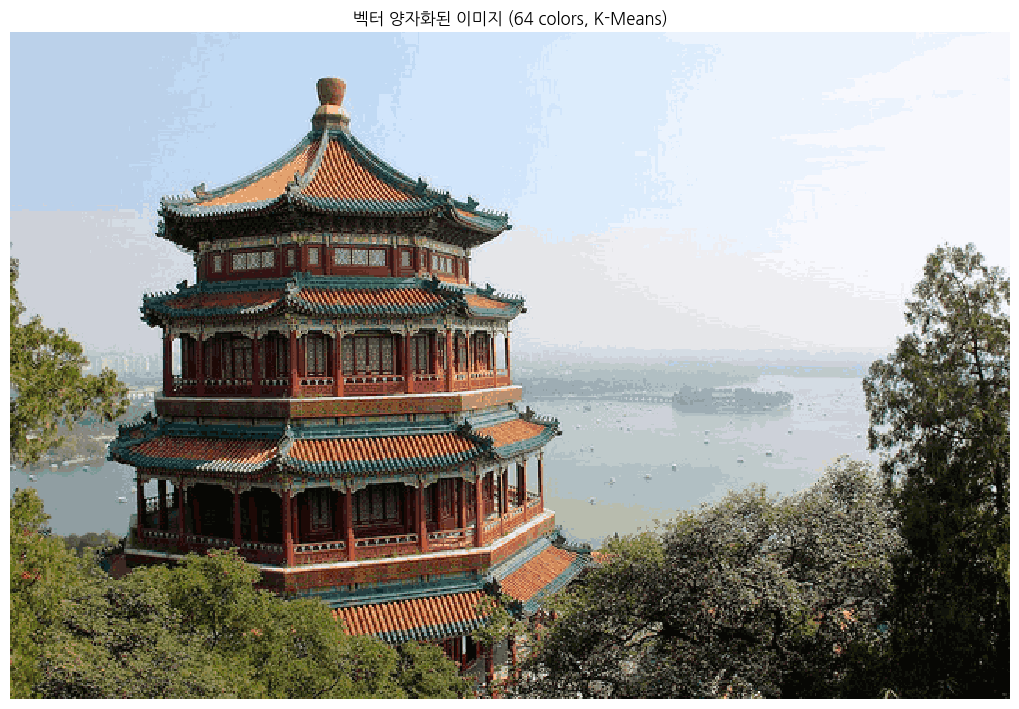

In [13]:
#email data
plt.figure(1)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('원본 이미지 (96,615 colors)')
plt.imshow(china)

plt.figure(2)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('벡터 양자화된 이미지 (64 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h)) 

In [ ]:
"""
427*540*3
64*3 # 컬러 팔레트 ,컬러 중심값 갯수: 
427*540*1
427*540*1 + 192
"""

(642, 860, 4)
[[[0.96862745 0.96862745 0.96862745 1.        ]
  [0.96862745 0.96862745 0.96862745 1.        ]
  [0.96862745 0.96862745 0.96862745 1.        ]
  ...
  [0.96862745 0.96862745 0.96862745 1.        ]
  [0.96862745 0.96862745 0.96862745 1.        ]
  [0.96862745 0.96862745 0.96862745 1.        ]]

 [[0.96862745 0.96862745 0.96862745 1.        ]
  [0.96862745 0.96862745 0.96862745 1.        ]
  [0.96862745 0.96862745 0.96862745 1.        ]
  ...
  [0.96862745 0.96862745 0.96862745 1.        ]
  [0.96862745 0.96862745 0.96862745 1.        ]
  [0.96862745 0.96862745 0.96862745 1.        ]]

 [[0.96862745 0.96862745 0.96862745 1.        ]
  [0.96862745 0.96862745 0.96862745 1.        ]
  [0.96862745 0.96862745 0.96862745 1.        ]
  ...
  [0.96862745 0.96862745 0.96862745 1.        ]
  [0.96862745 0.96862745 0.96862745 1.        ]
  [0.96862745 0.96862745 0.96862745 1.        ]]

 ...

 [[0.96862745 0.96862745 0.96862745 1.        ]
  [0.96862745 0.96862745 0.96862745 1.      

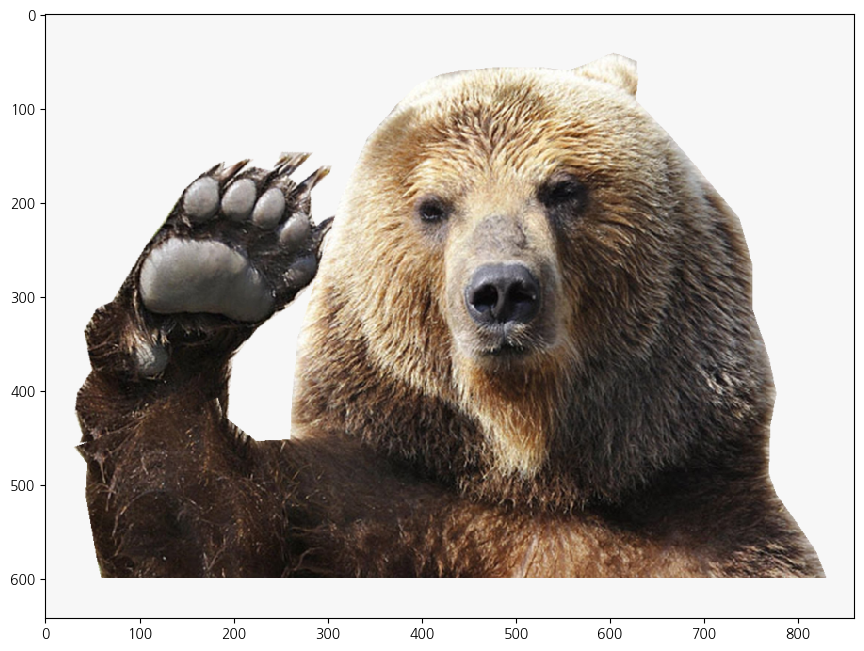

In [24]:
# 실기 문제 16칼라
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.cluster import KMeans
image = plt.imread("bear.png")
print(image.shape)
print(image)
plt.figure(figsize=(15,8))
plt.imshow(image)

642 860 4
[[0.96875149 0.96845571 0.96791184 1.        ]
 [0.32099475 0.27345769 0.25031086 1.        ]
 [0.72925492 0.61082355 0.4577255  1.        ]
 [0.18730729 0.1445592  0.12213741 1.        ]
 [0.51372551 0.3654902  0.24705883 1.        ]
 [0.87207573 0.80851928 0.68830293 1.        ]
 [0.2575503  0.20565317 0.1742297  1.        ]
 [0.41944445 0.28578432 0.19117647 1.        ]
 [0.10341998 0.08595531 0.07318742 1.        ]
 [0.63064635 0.48758171 0.35715324 1.        ]
 [0.91219097 0.87536233 0.79556693 1.        ]
 [0.39321268 0.34871796 0.32156864 1.        ]
 [0.83881002 0.75321164 0.61311699 1.        ]
 [0.61222609 0.55040372 0.50588237 1.        ]
 [0.71996437 0.66577542 0.61122997 1.        ]
 [0.47866206 0.43414072 0.40645906 1.        ]]
(16, 4)


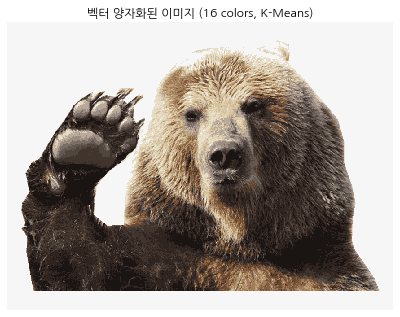

In [40]:
# 1. 이미지 사이즈 확인
image.shape
# 2. 정규화
image = np.array(image, dtype=np.float64)
n_colors =16
# 3. 16개로 군집화
# w, h, d = original_shape = tuple(image.shape)
w, h, d = image.shape
print(w,h,d)
# assert d ==3
image_array= np.reshape(image, (w*h,d))

image_array_samples = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=16, random_state=0).fit(image_array_samples)
labels = kmeans.predict(image_array)
# 4. 중심값 16개를 확인
print(kmeans.cluster_centers_)

# 5. 중심값의 shape를 확인
print(kmeans.cluster_centers_.shape)

# 6. 출력된 labels로 원래 이미지를 복원
def recreate_image(codebook, labels, w, h):# label로 표현된 값을 원래의 color값으로 복원
    d = codebook.shape[1] # 0,1 => 사이즈, 라벨
    image = np.zeros((w,h,d)) # ㅜ언래 이미지 사이ㅡㅈ로 초기화
    label_idx = 0

    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]] # 원래 컬러값 가져옴
            label_idx += 1
    return image

plt.figure(1)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('벡터 양자화된 이미지 (16 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h)) 

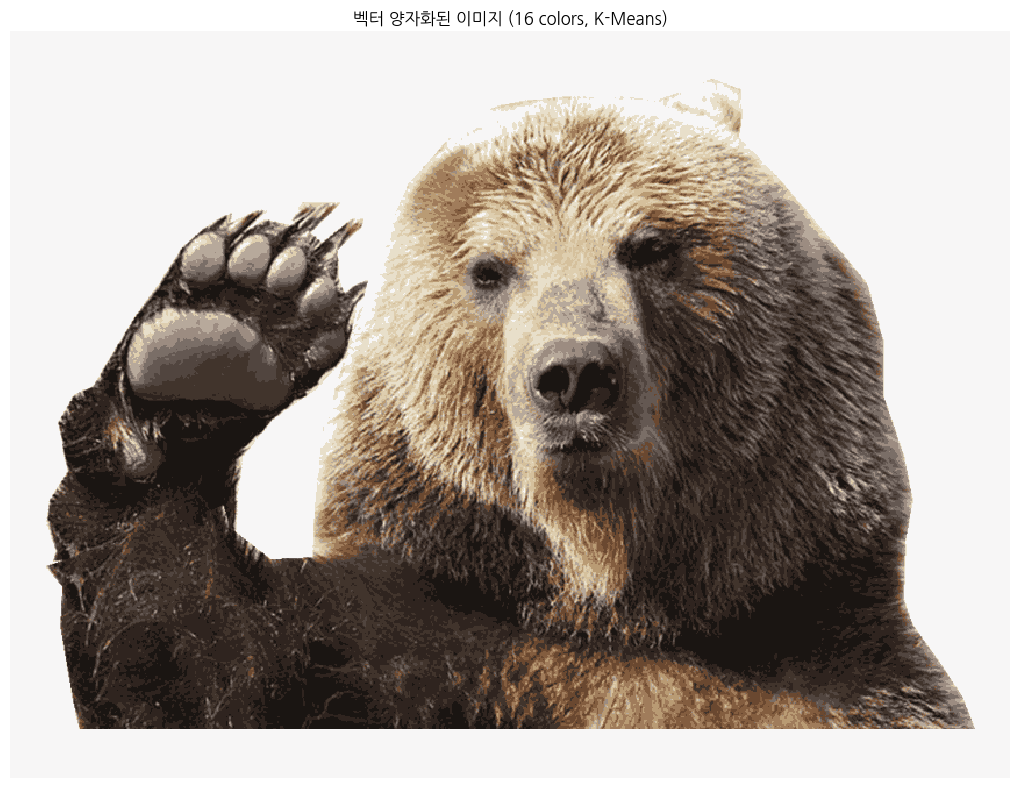

In [16]:
plt.figure(1)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('벡터 양자화된 이미지 (16 colors, K-Means)')
plt.imshow(kmeans.cluster_centers_[labels].reshape(w,h,d))
# 중심값에 레이블 값으...? 이게 왜 출력이 되는거냐
# 자동 매핑 지리네
# 중심값에 해당 레이블의 값을 대입.

In [ ]:
print(kmeans.labels_.size)
print(labels.size)

C:\Users\2-18\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-18\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


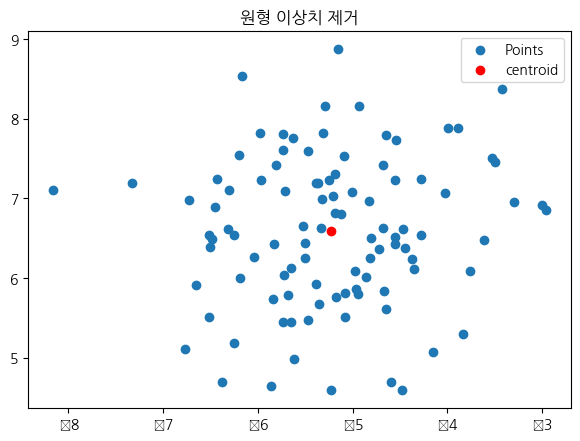

In [17]:
# 원형 이상치 제거
from sklearn.datasets import make_blobs
X, label = make_blobs(100,centers=1)
kmeans = KMeans(n_clusters=1)
kmeans.fit(X)

f, ax = plt.subplots(figsize=(7,5))
ax.set_title("원형 이상치 제거")
ax.scatter(X[:,0], X[:,1], label="Points")
ax.scatter(kmeans.cluster_centers_[:,0],
          kmeans.cluster_centers_[:,1], label="centroid", color="r")
ax.legend(loc="best")

distances = kmeans.transform(X) # 중심으로부터의 거리값

sorted_idx = np.argsort(distances.ravel())[::-1][:5] # rabel 1차원으로 변환
# argsort : 정렬을 실행하고 index를 취함. -> 정렬된 순서로 다른 데이터를 참조하기위함.
# :: 증가하면서, -> ::5 -> 5,10,15, ::-1 역순으로 # 오름차순 -> 내림차순
# 원점으로부터 먼 거리 5개를 선택

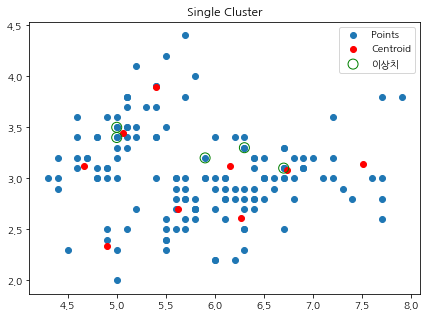

In [29]:
#email data
f, ax = plt.subplots(figsize=(7,5))
ax.set_title('Single Cluster')
ax.scatter(X[:, 0], X[:, 1], label='Points')
ax.scatter(kmeans.cluster_centers_[:, 0],
           kmeans.cluster_centers_[:, 1],
           label='Centroid', color='r')
ax.scatter(X[sorted_idx][:, 0],
           X[sorted_idx][:, 1],
           label='이상치', edgecolors='g',
           facecolors='none', s=100)
ax.legend(loc='best') 

In [30]:
# 이상치 제거
new_X = np.delete(X,sorted_idx, axis=0)
new_kmeans = KMeans(n_clusters=1)
new_kmeans.fit(new_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

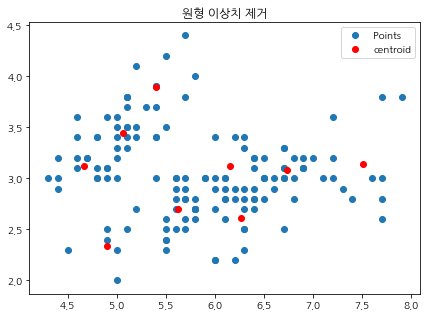

In [31]:
f, ax = plt.subplots(figsize=(7,5))
ax.set_title("원형 이상치 제거")
ax.scatter(new_X[:,0], new_X[:,1], label="Points")
ax.scatter(kmeans.cluster_centers_[:,0],
          kmeans.cluster_centers_[:,1], label="centroid", color="r")
ax.legend(loc="best")

Text(0, 0.5, '특성 0')

C:\Users\2-18\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-18\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


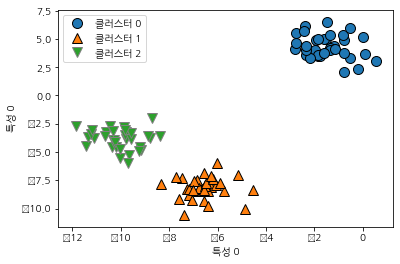

In [32]:
import mglearn
# 계층적 클러스터링
from sklearn.cluster import AgglomerativeClustering # 시각화 패키지가 없음


X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:,0],X[:,1], assignment)
plt.legend(["클러스터 0","클러스터 1","클러스터 2"],loc="best")
plt.xlabel("특성 0")
plt.ylabel("특성 0")

Text(0.5, 0, '샘플 번호')

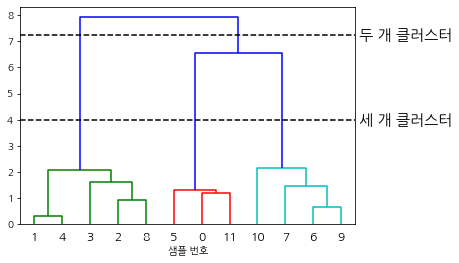

In [33]:
# email data 덴드로그램
# 탑색적 시각화를 위해 사용
from scipy.cluster.hierarchy import dendrogram, ward
X, y = make_blobs(random_state=0, n_samples=12)
linkage_array = ward(X)
dendrogram(linkage_array)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' 두 개 클러스터', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' 세 개 클러스터', va='center', fontdict={'size': 15})
plt.xlabel("샘플 번호") 

In [34]:
# DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=0, n_samples=12)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("클러스터 레이블:\n{}".format(clusters))

클러스터 레이블:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


Text(0, 0.5, '특성 1')

C:\Users\2-18\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-18\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


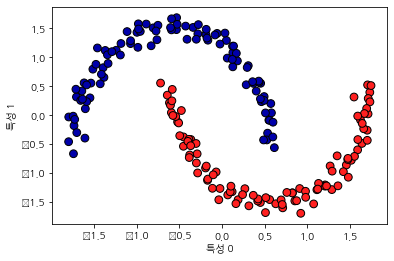

In [35]:
#email data
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import mglearn
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
            cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("특성 0")
plt.ylabel("특성 1") 

In [36]:
# 문제 : 숫자 이미지를 로딩하고 이를 scaling 해서 출력
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

# digits.data, 숫자 이미지 데이터
# digits.images, 간단한 이미지를 위한 대이터
# digits.target 숫자
digits = load_digits()

In [ ]:
digits

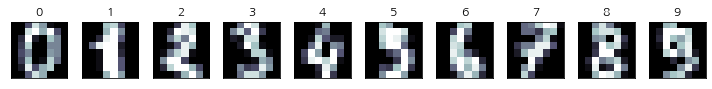

In [37]:
#email data 이미지 군집화
data = scale(digits.data)
def print_digits(images, labels):
    f = plt.figure(figsize=(10,2))

    plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
    i = 0
    while (i < 10 and i < images.shape[0]):
        # 이미지는 장수, 이미지 사이즈, 컬러채널
        ax = f.add_subplot(1, 10, i + 1) # 실시간으로 서브도화지 추가
        ax.imshow(images[i], cmap=plt.cm.bone)
        ax.grid(False)
        ax.table # 오른쪽에 테이블 처럼 추가.
        ax.set_title(labels[i])
        ax.xaxis.set_ticks([]) # 공백 == 지우기 
        ax.yaxis.set_ticks([])
        plt.tight_layout()
        i += 1
print_digits(digits.images, range(10)) 

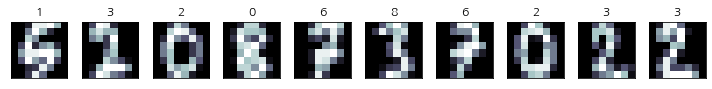

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(
    data, digits.target, digits.images, test_size=0.25, random_state=42)
 # digits.images 는 축소된 이미지
from sklearn.cluster import KMeans

# 비지도 학스븡ㄹ 지도학습으로 변환
# 최적지를 선택 (라벨을 만들때 검증)
clf = KMeans(init="k-means++", n_clusters=10, random_state=42)
clf.fit(X_train)

print_digits(images_train, clf.labels_) # 비지도학습에서의 자기 예측값

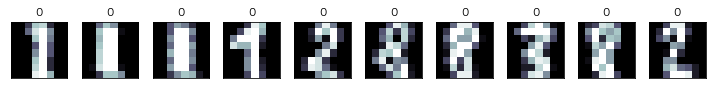

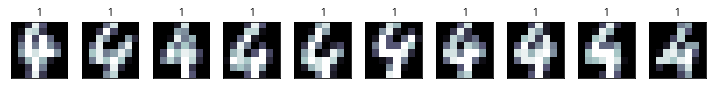

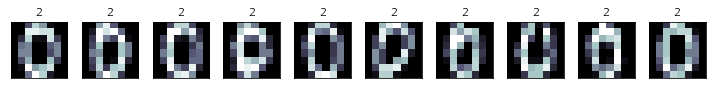

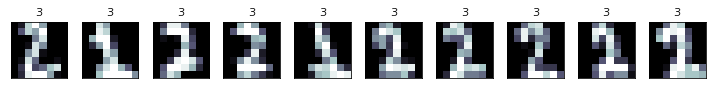

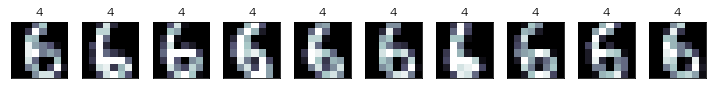

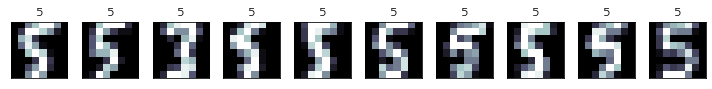

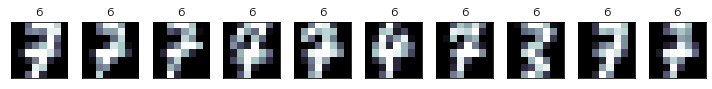

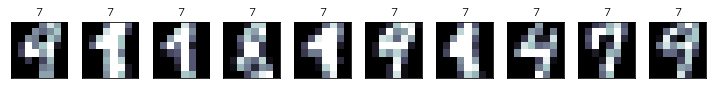

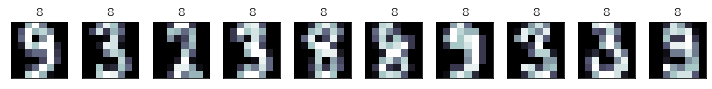

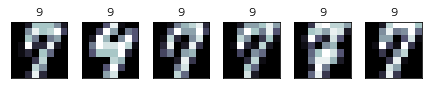

In [39]:
# 이미지만 있다. -> target 이 없다.
# => target : labels
# => 비지도 학습이 지도학습으로 변환
y_pred = clf.predict(X_test)
def print_cluster(images, y_pred, cluster_number):
    images = images[y_pred == cluster_number]
    y_pred = y_pred[y_pred == cluster_number]
    print_digits(images, y_pred)
for i in range(10):
    print_cluster(images_test,y_pred,i)